In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [29]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

# Change the conditions below to compare between other two digits.
class1Indices = (y==0)
class2Indices = (y==1)

x1 = X[class1Indices]
x2 = X[class2Indices]

Xtrain = np.concatenate((x1,x2),axis=0)
ytrain = np.concatenate((np.zeros(x1.shape[0]),np.ones(x2.shape[0])),axis=0)

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)



c:\Users\Adnane Ezouhri\Desktop\School\Machine_Learning\.venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Split the data to training, testing, and validation subsets

In [30]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets
    
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1) # 0.25 x 0.8 = 0.2


Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]


# Accuracy of a classifier

In [31]:
def testLinearClassifier(a, X, y):
    # Add a bias term to the feature vectors
    X_bias = np.hstack((X, np.ones((X.shape[0], 1))))
    
    # Compute the predictions
    predictions = np.dot(X_bias, a)
    predicted_labels = (predictions > 0).astype(int)
    
    # Count the misclassifications
    misclassifications = np.sum(predicted_labels != y)
    
    return misclassifications



## Define and test gaussianClassifierWithIdentityCovariance 

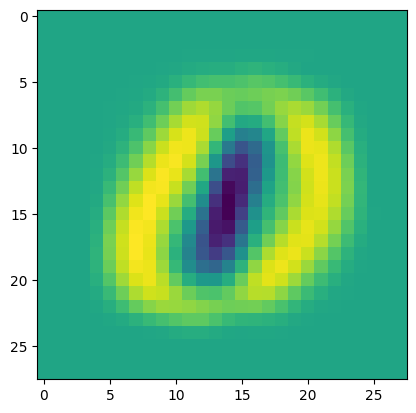

In [32]:
#------TRAINING CODE --------------

def gaussianClassifierWithIdentityCovariance(Xtrain, ytrain):
    # Split the dataset into two classes
    X1 = Xtrain[ytrain == 0]
    X2 = Xtrain[ytrain == 1]

    # Compute the means
    mu1 = np.mean(X1, axis=0)
    mu2 = np.mean(X2, axis=0)

    # Compute the weights
    a = np.hstack(((mu1 - mu2), 0))  # Append 0 for bias term

    return a
    #YOUR CODE HERE


#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithIdentityCovariance(X_train,y_train)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)



## Define and test gaussianClassifierWithCommonCovariance 

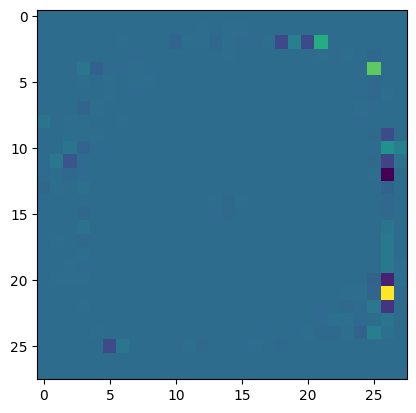

In [33]:
#------TRAINING CODE --------------

def gaussianClassifierWithCommonCovariance(Xtrain, ytrain):
    # Split the dataset into two classes
    X1 = Xtrain[ytrain == 0]
    X2 = Xtrain[ytrain == 1]

    # Compute the means
    mu1 = np.mean(X1, axis=0)
    mu2 = np.mean(X2, axis=0)

    # Compute the common covariance matrix
    Sigma = np.cov(Xtrain.T)

    # Use pseudoinverse in place of regular inverse
    a = np.dot(np.linalg.pinv(Sigma), mu1 - mu2)
    a = np.hstack((a, 0))  # Append 0 for bias term

    return a

    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithCommonCovariance(X_train,y_train)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)


## Define and test logisticRegression 

You may choose the step size as 1e-4. You can try changing it.

Use the expit() function from scipy.special.expit to implement sigmoid without overflow errors 

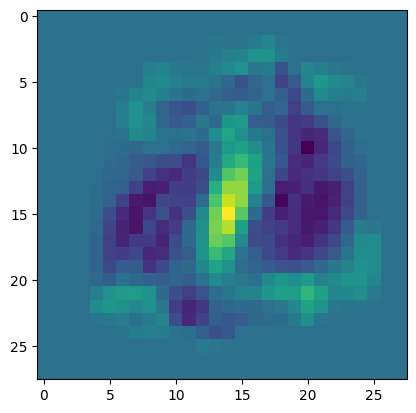

In [34]:
def logisticRegression(Xtrain, ytrain, iterations=100, step_size=1e-4, verbose= False):
    a = np.zeros(Xtrain.shape[1] + 1)  # Initialize weights with zeros

    # Add a bias term to the feature vectors
    X_bias = np.hstack((Xtrain, np.ones((Xtrain.shape[0], 1))))

    for i in range(iterations):
        # Calculate the model predictions
        predictions = expit(np.dot(X_bias, a))

        # Update the weights
        a -= step_size * np.dot(X_bias.T, (predictions - ytrain))

    return a
    #YOUR CODE HERE
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegression(X_train,y_train,iterations=500,verbose=False)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)



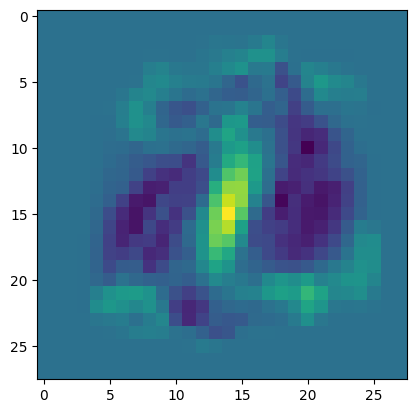

In [35]:
def logisticRegressionWithRegularization(Xtrain, ytrain, iterations=100, step_size=1e-4, lam=0.1, verbose= False):
    a = np.zeros(Xtrain.shape[1] + 1)  # Initialize weights with zeros

    # Add a bias term to the feature vectors
    X_bias = np.hstack((Xtrain, np.ones((Xtrain.shape[0], 1))))

    for i in range(iterations):
        # Calculate the model predictions
        predictions = expit(np.dot(X_bias, a))

        # Gradient of the loss function with L2 regularization
        gradient = np.dot(X_bias.T, (predictions - ytrain)) + lam * a

        # Update the weights, skip the bias term for regularization
        a[0] -= step_size * np.dot(X_bias.T[0], (predictions - ytrain))
        a[1:] -= step_size * gradient[1:]

    return a

    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)


In [36]:
def optimizeHyperparameters(Xtrain, ytrain, Xval, yval, iterations=100, step_size=1e-4):
    # Define a set of possible lambda values
    lambda_values = np.logspace(-5, 1, num=50)

    best_lambda = None
    best_val_error = float('inf')

    # Iterate over all possible lambda values
    for lambda_reg in lambda_values:
        # Train a model with the current lambda value
        a = logisticRegressionWithRegularization(Xtrain, ytrain, iterations, step_size, lambda_reg)

        # Compute the error on the validation set
        val_error = testLinearClassifier(a, Xval, yval)

        # If this model is better than the previous best, update the best model
        if val_error < best_val_error:
            best_val_error = val_error
            best_lambda = lambda_reg

    return best_lambda


# REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW